In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [27]:
class RollingWindowPerceptron:
    def __init__(self, M=2000, n=0.5, p=3, expected=0, eps=1e-5):
        self.M = M
        self.n = n
        self.p = p
        self.eps = eps
        self.w = [0 for _ in range(p + 1)]
        self.w[0] = expected
        
    @staticmethod
    def mse(sigmas):
        return np.sqrt((np.array(sigmas)**2).sum())
        
    def fit(self, X): 
        m = len(X)
        train_sets = [X[shift:shift+self.p] for shift in range(m - self.p)]
        train_target = [X[i] for i in range(self.p, m)]
        
        epoch = 0
        curr_error = None
        while epoch < self.M or (epoch > self.M and curr_error > self.eps):
            errors = []
            for i in range(len(train_sets)):
                s = train_sets[i]
                s = [1] + s
                target = train_target[i]
                net = sum([s[i] * self.w[i] for i in range(len(s))])
                
                sigma = target - net
                errors.append(sigma)
                if sigma != 0:
                    for i in range(len(s)):
                        self.w[i] += self.n * sigma * s[i]
                        
                epoch += 1
                if epoch == self.M:
                    break
            curr_error = self.mse(errors)
            
    def predict(self, x):
        X = [1] + x[len(x) - self.p:]
        return sum([X[i]*self.w[i] for i in range(len(X))])
    

# График исходной функции на интервале [a, b]

In [28]:
def func(t):
    return math.cos(t)**2 - 0.5

In [29]:
N = 20
a = -1
b = 0.5

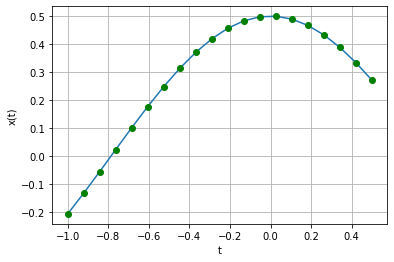

In [42]:
t1 = np.linspace(a, b, num=N)
x1 = [func(t_i) for t_i in t1]

plt.plot(t1, x1)
plt.plot(t1, x1, 'go')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)

# Прогноз функции при M=9000 на интервале (b, 2b-a]

In [52]:
t2 = np.linspace(a, 2 * b - a, num=2 * N - 1)
x2 = [func(t_i) for t_i in t2]

In [53]:
perceptron = RollingWindowPerceptron(M=900)
perceptron.fit(x2)

pred_t = list(set(t2) - set(t1))
pred_t.sort()
pred_x = []
work_x = [] + x1
for i in range(len(x2) - len(x1)):
    pred = perceptron.predict(work_x)
    pred_x.append(pred)
    work_x.append(pred)
    
perceptron.mse(np.array(work_x) - np.array(x2))

0.2801290205730831

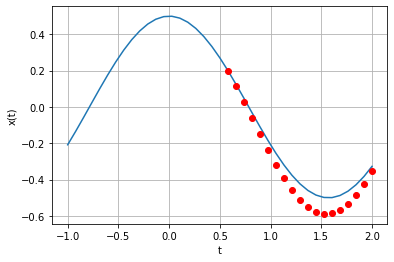

In [54]:
plt.plot(t2, x2)
plt.plot(pred_t, pred_x, 'ro')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)

# Прогноз функции при M=4000 на интервале (b, 2b-a]

In [55]:
perceptron = RollingWindowPerceptron(M=4000)
perceptron.fit(x2)

pred_t = list(set(t2) - set(t1))
pred_t.sort()
pred_x = []
work_x = [] + x1
for i in range(len(x2) - len(x1)):
    pred = perceptron.predict(work_x)
    pred_x.append(pred)
    work_x.append(pred)
    
perceptron.mse(np.array(work_x) - np.array(x2))

3.980746988017052e-09

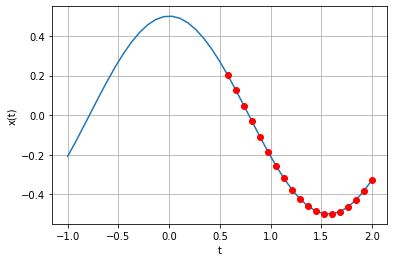

In [56]:
plt.plot(t2, x2)
plt.plot(pred_t, pred_x, 'ro')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)

# Зависимость ошибки от различной ширины окна

In [61]:
errors = []
for p_i in range(1, 8): 
    perceptron = RollingWindowPerceptron(p=p_i)
    perceptron.fit(x2)
    
    work_x = [] + x1
    for i in range(len(x2) - len(x1)):
        pred = perceptron.predict(work_x)
        work_x.append(pred)
    diffs = [work_x[i] - x2[i] for i in range(len(work_x))]
    errors.append(perceptron.mse(diffs))

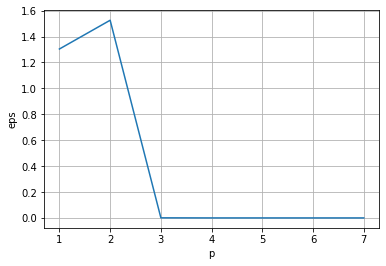

In [63]:
plt.plot(range(1, 8), errors)
plt.xlabel('p')
plt.ylabel('eps')
plt.grid(True)

# Зависимость ошибки от различной нормы обучения

In [65]:
errors = []
n_range = list(np.arange(0.1, 1.01, 0.01))
for n_i in n_range: 
    perceptron = RollingWindowPerceptron(n=n_i)
    perceptron.fit(x2)
    
    work_x = [] + x1
    for i in range(len(x2) - len(x1)):
        pred = perceptron.predict(work_x)
        work_x.append(pred)
    diffs = [work_x[i] - x2[i] for i in range(len(work_x))]
    errors.append(perceptron.mse(diffs))

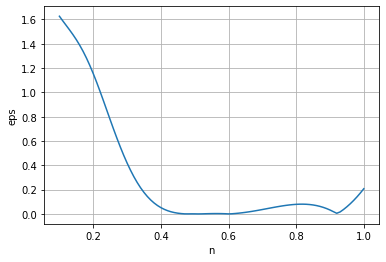

In [66]:
plt.plot(n_range, errors)
plt.xlabel('n')
plt.ylabel('eps')
plt.grid(True)

# Зависимость ошибки от различного количества эпох

In [68]:
errors = []
M_range = list(np.arange(100, 4000, 100))
for m_i in M_range: 
    perceptron = RollingWindowPerceptron(M=m_i)
    perceptron.fit(x2)
    
    work_x = [] + x1
    for i in range(len(x2) - len(x1)):
        pred = perceptron.predict(work_x)
        work_x.append(pred)
    diffs = [work_x[i] - x2[i] for i in range(len(work_x))]
    errors.append(perceptron.mse(diffs))

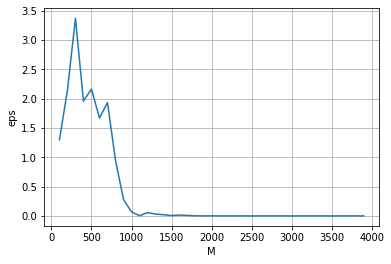

In [69]:
plt.plot(M_range, errors)
plt.xlabel('M')
plt.ylabel('eps')
plt.grid(True)